# Import Libraries

In [ ]:
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

%tensorflow_version 2.x
import tensorflow as tf

# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Permute
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, MeanAbsoluteError
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

from tensorflow.keras import initializers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, SimpleRNN, LSTMCell, MaxPooling1D, Flatten, RepeatVector, GRU, Input

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
# from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#avoid Out Of Memory (OOM) errors by setting GPU memory consumption growth
gpuSystem = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpuSystem:
    tf.config.experimental.set_memory_growth(gpu, True)


import tensorflow as tf

# Set mixed precision policy
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

Mounted at /content/drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Data Augmentation

In [ ]:
# import os
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the path for the directory with multiple images
# image_directory = '/content/drive/MyDrive/archive/periodontal'

# # Create an instance of the ImageDataGenerator with the desired augmentation settings
# augmentation_settings = {
#     'rotation_range': 30,
#     'rotation_range': 60,
#     'rotation_range': 90,
#     'rotation_range': 120,
#     'rotation_range': 150,
#     'rotation_range': 210,
#     'rotation_range': 240,
#     'rotation_range': 270,
#     'horizontal_flip': True,
#     'vertical_flip': True
# }
# data_generator = ImageDataGenerator(**augmentation_settings)

# # Get the list of image file names in the directory
# image_files = os.listdir(image_directory)

# # Create the output directory for augmented images if it doesn't exist
# augmented_directory = '/content/drive/MyDrive/augmented_periodontal3'
# os.makedirs(augmented_directory, exist_ok=True)

# # Define the number of augmented images per original image
# num_augmented_images = 100

# # Apply data augmentation to each image in the directory
# for filename in image_files:
#     # Load the image
#     image_path = os.path.join(image_directory, filename)
#     img = image.load_img(image_path, target_size=(256, 256))

#     # Convert the image to a numpy array
#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     # Generate multiple augmented images for each original image
#     i = 0
#     for batch in data_generator.flow(x, batch_size=1, save_to_dir=augmented_directory,
#                                      save_prefix='periodontal_', save_format='png'):
#         i += 1
#         if i >= num_augmented_images:
#             break

# print("Data augmentation completed.")


In [ ]:
# import os
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the path for the directory with multiple images
# image_directory = '/content/drive/MyDrive/archive/non-periodontal'

# # Create an instance of the ImageDataGenerator with the desired augmentation settings
# augmentation_settings = {
#     'rotation_range': 30,
#     'rotation_range': 60,
#     'rotation_range': 90,
#     'rotation_range': 120,
#     'rotation_range': 150,
#     'rotation_range': 210,
#     'rotation_range': 240,
#     'rotation_range': 270,
#     'horizontal_flip': True,
#     'vertical_flip': True
# }
# data_generator = ImageDataGenerator(**augmentation_settings)

# # Get the list of image file names in the directory
# image_files = os.listdir(image_directory)

# # Create the output directory for augmented images if it doesn't exist
# augmented_directory = '/content/drive/MyDrive/augmented_non-periodontal5'
# os.makedirs(augmented_directory, exist_ok=True)

# # Define the number of augmented images per original image
# num_augmented_images = 100

# # Apply data augmentation to each image in the directory
# for filename in image_files:
#     # Load the image
#     image_path = os.path.join(image_directory, filename)
#     img = image.load_img(image_path, target_size=(350, 350))

#     # Convert the image to a numpy array
#     x = image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     # Generate multiple augmented images for each original image
#     i = 0
#     for batch in data_generator.flow(x, batch_size=1, save_to_dir=augmented_directory,
#                                      save_prefix='non-periodontal_', save_format='png'):
#         i += 1
#         if i >= num_augmented_images:
#             break

# print("Data augmentation completed.")


# Load and Clean Data

In [ ]:
# dataset_dir = '/content/drive/MyDrive/archive3'

In [ ]:
# data = []
# labels = []

In [ ]:
# for class_label in os.listdir(dataset_dir):
#     class_dir = os.path.join(dataset_dir, class_label)
#     if os.path.isdir(class_dir):
#         for image_file in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_file)
#             if os.path.isfile(image_path):
#                 image = cv2.imread(image_path)
#                 # Perform any necessary preprocessing on the image
#                 flattened_image = image.flatten()  # Reshape to 1-dimensional vector
#                 data.append(flattened_image)
#                 labels.append(class_label)

In [ ]:
# data = np.array(data)
# labels = np.array(labels)

In [ ]:
# df = pd.DataFrame({"data": data.tolist(), "label": labels})

In [ ]:
data_dir = '/content/drive/MyDrive/archive3'

In [ ]:
os.listdir(data_dir)

['periodontal', 'non-periodontal']

In [ ]:
image_exists = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exists:
                print("image not exist list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/archive3', 'periodontal', 'periodontal__0_15.png'))
img.shape


(256, 256, 3)

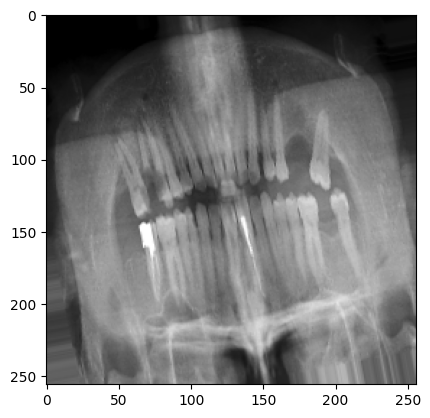

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive3', image_size=(350,350), batch_size=32, shuffle=True, labels='inferred')
data

Found 6958 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 350, 350, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
#if run again will get another batch from the iterator
batch = data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
#images represented as numpy arrays
batch[0].shape

(32, 350, 350, 3)

In [ ]:
#class 1 = periodontal
#class 0 = non periodontal
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

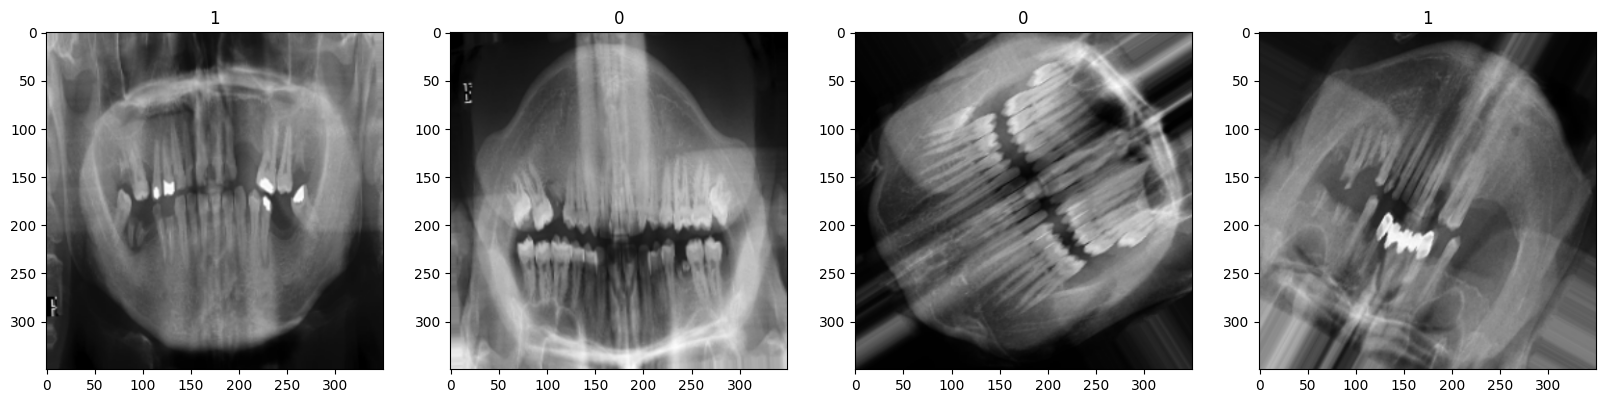

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.max()

1.0

# Preprocess the Data

In [ ]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

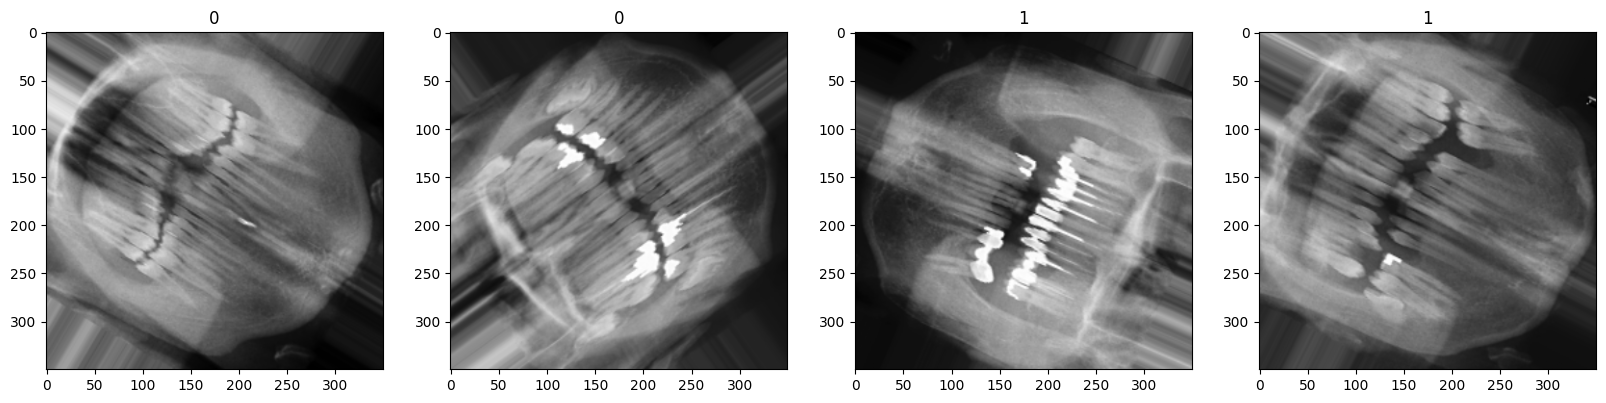

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
plt.show()

# split data

In [ ]:
len(scaled_data)

218

In [ ]:
#train 70%, validation 20%, test 10%
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)+1
test_size = int(len(scaled_data)*.1)+1
train_size + val_size + test_size

218

In [ ]:
train_size

152

In [ ]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size).skip(val_size).take(test_size)

# Deep Models

## MobileNet V2

### Model Building

In [ ]:
pretrainedModel = tf.keras.applications.MobileNetV2(
    input_shape=(350,350,3),
     include_top=False,
     weights='imagenet',
     pooling='avg'
)
pretrainedModel.trainable = False

inputs = pretrainedModel.input

x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(pretrainedModel.output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 175, 175, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 175, 175, 32  128         ['Conv1[0][0]']                  
                               

### Model Training

In [ ]:
def sched(epoch, lr):
    return lr * tf.math.exp(-0.1)

model_1 = model.fit(
    train,
    validation_data=val,
    verbose=1,
    epochs=100,
    callbacks = [tf.keras.callbacks.LearningRateScheduler(sched),
                 tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=100)],
)

Epoch 1/100
152/152 [==============================] - 74s 446ms/step - loss: 3.0328 - accuracy: 0.7356 - recall_2: 0.7872 - val_loss: 1.2952 - val_accuracy: 0.8438 - val_recall_2: 0.8159 - lr: 9.0484e-04
Epoch 2/100
152/152 [==============================] - 68s 440ms/step - loss: 1.0007 - accuracy: 0.8355 - recall_2: 0.8555 - val_loss: 0.7417 - val_accuracy: 0.8707 - val_recall_2: 0.9426 - lr: 8.1873e-04
Epoch 3/100
152/152 [==============================] - 68s 446ms/step - loss: 0.6612 - accuracy: 0.8655 - recall_2: 0.8803 - val_loss: 0.5312 - val_accuracy: 0.8956 - val_recall_2: 0.9239 - lr: 7.4082e-04
Epoch 4/100
152/152 [==============================] - 68s 443ms/step - loss: 0.5106 - accuracy: 0.8898 - recall_2: 0.9011 - val_loss: 0.4415 - val_accuracy: 0.9034 - val_recall_2: 0.8920 - lr: 6.7032e-04
Epoch 5/100
152/152 [==============================] - 53s 340ms/step - loss: 0.4516 - accuracy: 0.8962 - recall_2: 0.9061 - val_loss: 0.4184 - val_accuracy: 0.9013 - val_recall_2:

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


1/1 [==============================] - 0s 43ms/step
Precision: 0.9829268455505371, Recall: 0.9901719689369202, BAccuracy: 0.9841954112052917, F1 Score: 0.9865361077111383, AUC: 0.9978065514397695


### Plot Performance

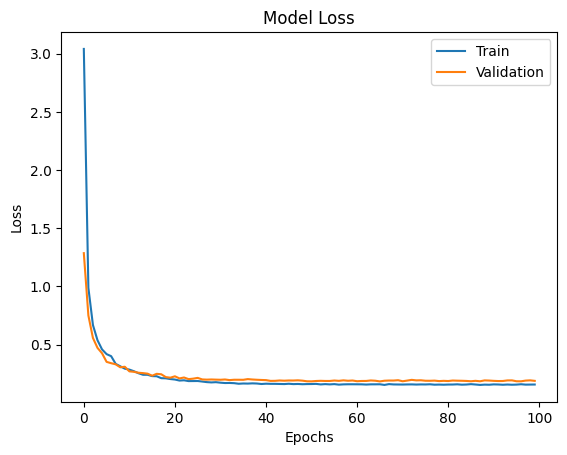

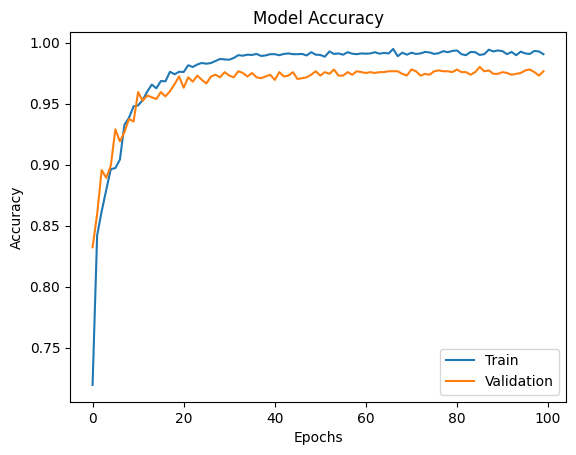

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.savefig('loss_curve.png')  # Save the plot as an image file
plt.show()

# Plotting the accuracy curve
plt.plot(model_1.history['accuracy'])
plt.plot(model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.savefig('accuracy_curve.png')  # Save the plot as an image file
plt.show()

## VGG16

### Model Building

In [ ]:
import tensorflow as tf

# Load the VGG-16 model with pre-trained weights, excluding the fully connected layers
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(350,350,3)  # Input image shape (adjust as needed)
)

# Freeze the pre-trained layers to avoid overfitting on small datasets
base_model.trainable = False

# Add the additional layers to the VGG-16 model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 4 neurons for multi-class classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',   # Categorical crossentropy for multi-class classification
    optimizer='adam',
    metrics=['accuracy'],
)

# Print the summary of the model
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 27,822,401
Trainable params: 13,107,713
Non-trainable params: 14,714,688
____________________________________

### Model Training

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
# def sched(epoch, lr):
#     return lr * tf.math.exp(-0.1)

model_1 = model.fit(train, epochs=100, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/100
152/152 [==============================] - 110s 591ms/step - loss: 0.8556 - accuracy: 0.7017 - val_loss: 0.3734 - val_accuracy: 0.8402
Epoch 2/100
152/152 [==============================] - 97s 636ms/step - loss: 0.4028 - accuracy: 0.8162 - val_loss: 0.3041 - val_accuracy: 0.8729
Epoch 3/100
152/152 [==============================] - 98s 636ms/step - loss: 0.3655 - accuracy: 0.8273 - val_loss: 0.2705 - val_accuracy: 0.8963
Epoch 4/100
152/152 [==============================] - 94s 614ms/step - loss: 0.3263 - accuracy: 0.8456 - val_loss: 0.2605 - val_accuracy: 0.9134
Epoch 5/100
152/152 [==============================] - 95s 622ms/step - loss: 0.2971 - accuracy: 0.8569 - val_loss: 0.2461 - val_accuracy: 0.8849
Epoch 6/100
152/152 [==============================] - 96s 624ms/step - loss: 0.2646 - accuracy: 0.8701 - val_loss: 0.1859 - val_accuracy: 0.9332
Epoch 7/100
152/152 [==============================] - 94s 615ms/step - loss: 0.2677 - accuracy: 0.8602 - val_loss: 0.1735 

In [ ]:
model_1.history

{'loss': [0.8556379079818726,
  0.4028213918209076,
  0.3654657304286957,
  0.32626113295555115,
  0.29714369773864746,
  0.2646122872829437,
  0.2676990032196045,
  0.2199590653181076,
  0.22184419631958008,
  0.18098776042461395,
  0.2167171984910965,
  0.2488790601491928,
  0.2054578959941864,
  0.18282966315746307,
  0.19087302684783936,
  0.20395933091640472,
  0.15963944792747498,
  0.1761046051979065,
  0.16330111026763916,
  0.16771405935287476,
  0.16640298068523407,
  0.147533118724823,
  0.1920214593410492,
  0.27688202261924744,
  0.21800751984119415,
  0.1757781058549881,
  0.17037633061408997,
  0.1892462968826294,
  0.1916513890028,
  0.16469630599021912,
  0.17492274940013885,
  0.16712898015975952,
  0.1661940962076187,
  0.1588735431432724,
  0.16754569113254547,
  0.19039864838123322,
  0.2209584265947342,
  0.2117769569158554,
  0.21472933888435364,
  0.19061173498630524,
  0.1625603437423706,
  0.16670429706573486,
  0.16762903332710266,
  0.16261182725429535,
  0.

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


1/1 [==============================] - 9s 9s/step
Precision: 0.9873417615890503, Recall: 0.9558823704719543, BAccuracy: 0.9669540524482727, F1 Score: 0.9713574097135741, AUC: 0.997140522875817


### Plot Performance

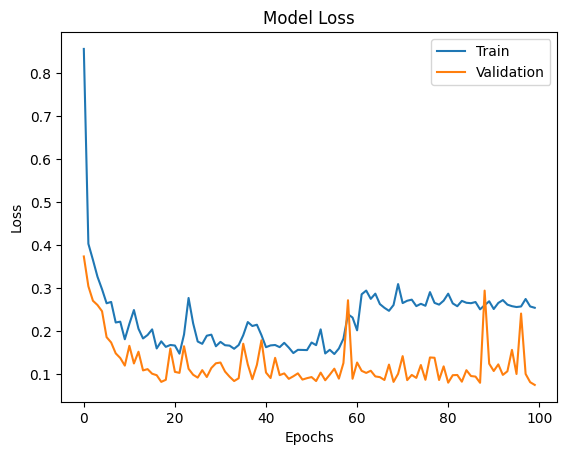

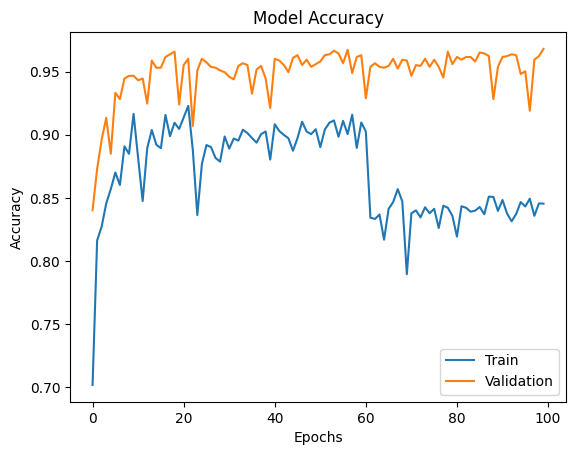

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.savefig('loss_curve.png')  # Save the plot as an image file
plt.show()

# Plotting the accuracy curve
plt.plot(model_1.history['accuracy'])
plt.plot(model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.savefig('accuracy_curve.png')  # Save the plot as an image file
plt.show()

## CNN1

### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(350, 350, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(192, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(384, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 192)     110784    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 192)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 384)       663936    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 384)      0

### Model Training

In [ ]:
def sched(epoch, lr):
    return lr * tf.math.exp(-0.1)

hist = model.fit(
    train,
    validation_data=val,
    verbose=1,
    epochs=100,
    callbacks = [tf.keras.callbacks.LearningRateScheduler(sched),
                 tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=100)],
)

Epoch 1/100
152/152 [==============================] - 115s 607ms/step - loss: 0.8515 - accuracy: 0.5713 - val_loss: 0.5747 - val_accuracy: 0.6705 - lr: 9.0484e-04
Epoch 2/100
152/152 [==============================] - 95s 612ms/step - loss: 0.5028 - accuracy: 0.7373 - val_loss: 0.4740 - val_accuracy: 0.7457 - lr: 8.1873e-04
Epoch 3/100
152/152 [==============================] - 94s 612ms/step - loss: 0.3740 - accuracy: 0.8281 - val_loss: 0.3794 - val_accuracy: 0.8281 - lr: 7.4082e-04
Epoch 4/100
152/152 [==============================] - 95s 612ms/step - loss: 0.2455 - accuracy: 0.8980 - val_loss: 0.3284 - val_accuracy: 0.8558 - lr: 6.7032e-04
Epoch 5/100
152/152 [==============================] - 94s 613ms/step - loss: 0.1597 - accuracy: 0.9383 - val_loss: 0.3048 - val_accuracy: 0.8935 - lr: 6.0653e-04
Epoch 6/100
152/152 [==============================] - 94s 611ms/step - loss: 0.0894 - accuracy: 0.9704 - val_loss: 0.3278 - val_accuracy: 0.8913 - lr: 5.4881e-04
Epoch 7/100
152/152 [

In [ ]:
hist.history

{'loss': [0.8515012860298157,
  0.5027832984924316,
  0.3740212917327881,
  0.2455473393201828,
  0.1597261130809784,
  0.08939623832702637,
  0.04946572706103325,
  0.03337997943162918,
  0.017959166318178177,
  0.013845079578459263,
  0.00909501127898693,
  0.005074373446404934,
  0.003947065677493811,
  0.004489855375140905,
  0.007947036065161228,
  0.0019055495504289865,
  0.0025473576970398426,
  0.0024108008947223425,
  0.0019561368972063065,
  0.001854125177487731,
  0.002013067714869976,
  0.001021876814775169,
  0.0006068284274078906,
  0.0008185821352526546,
  0.0003746144939213991,
  0.0011224834015592933,
  0.0009496937273070216,
  0.005216280464082956,
  0.0008385092951357365,
  0.0009093049447983503,
  0.0003243805840611458,
  0.0005038240924477577,
  0.0008790408610366285,
  0.000552042038179934,
  0.0006020038854330778,
  0.0006253859610296786,
  0.00035455162287689745,
  0.0004954634350724518,
  0.0004227831377647817,
  0.0002797488705255091,
  0.00033552799141034484,

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


1/1 [==============================] - 0s 65ms/step
Precision: 0.9424083828926086, Recall: 0.913705587387085, BAccuracy: 0.9195402264595032, F1 Score: 0.9278350515463917, AUC: 0.9687195347429992


### Plot Performance

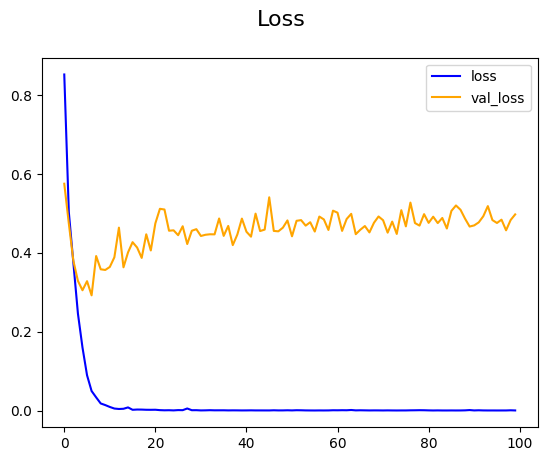

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 16)
plt.legend(loc = 'upper right')
plt.show()

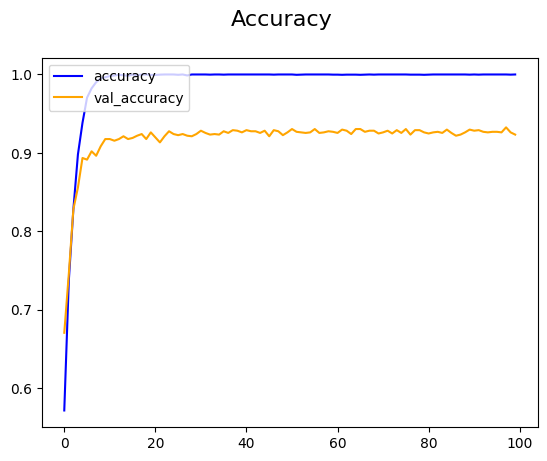

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'blue', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()

## DeNTNet

### Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
# Conv-Layer 1
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (350,350,3)))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 2
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Max-Pooling 1
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Conv-Layer 3
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 4
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Max-Pooling 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Conv-Layer 5
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 6
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Max-Pooling 3
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Conv-Layer 7
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 8
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Max-Pooling 4
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Conv-Layer 9
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 10
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 11
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# Conv-Layer 12
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

# AveragePooling
model.add(tf.keras.layers.GlobalAveragePooling2D())

# Dropout 1 (0.8)
model.add(tf.keras.layers.Dropout(0.8))

# Dense-Layer 1
model.add(tf.keras.layers.Dense(1024, activation='relu'))

# Dropout 2 (0.8)
model.add(tf.keras.layers.Dropout(0.8))

# Dense-Layer 2
model.add(tf.keras.layers.Dense(512, activation='relu'))

# Output Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 346, 346, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 32)     0         
 )                                                               
                                                        

### Model Training

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs=100, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/100
152/152 [==============================] - 140s 716ms/step - loss: 0.8808 - accuracy: 0.5900 - val_loss: 1.0615 - val_accuracy: 0.5874
Epoch 2/100
152/152 [==============================] - 100s 653ms/step - loss: 0.5368 - accuracy: 0.7259 - val_loss: 3.8604 - val_accuracy: 0.5597
Epoch 3/100
152/152 [==============================] - 98s 634ms/step - loss: 0.4331 - accuracy: 0.7928 - val_loss: 3.0619 - val_accuracy: 0.5625
Epoch 4/100
152/152 [==============================] - 112s 724ms/step - loss: 0.3567 - accuracy: 0.8468 - val_loss: 2.9081 - val_accuracy: 0.5398
Epoch 5/100
152/152 [==============================] - 111s 726ms/step - loss: 0.3228 - accuracy: 0.8581 - val_loss: 1.0651 - val_accuracy: 0.5803
Epoch 6/100
152/152 [==============================] - 111s 723ms/step - loss: 0.2861 - accuracy: 0.8832 - val_loss: 1.1162 - val_accuracy: 0.5611
Epoch 7/100
152/152 [==============================] - 111s 724ms/step - loss: 0.1992 - accuracy: 0.9229 - val_loss: 2.

In [ ]:
hist.history

{'loss': [0.8807722330093384,
  0.5368475317955017,
  0.4330546259880066,
  0.35667213797569275,
  0.32275575399398804,
  0.2860838770866394,
  0.1991918683052063,
  0.16042287647724152,
  0.13043582439422607,
  0.11406652629375458,
  0.10662315785884857,
  0.09255323559045792,
  0.07658034563064575,
  0.05852195993065834,
  0.07483314722776413,
  0.07284509390592575,
  0.028778132051229477,
  0.06971447914838791,
  0.04883648082613945,
  0.03452413156628609,
  0.034157976508140564,
  0.05602522939443588,
  0.03991298750042915,
  0.05193948745727539,
  0.030976932495832443,
  0.02795908972620964,
  0.04911863058805466,
  0.04951690509915352,
  0.039495404809713364,
  0.04372029006481171,
  0.023742306977510452,
  0.031373195350170135,
  0.03520660474896431,
  0.01202636118978262,
  0.02222888171672821,
  0.031842201948165894,
  0.025957876816391945,
  0.030295293778181076,
  0.030351506546139717,
  0.020269878208637238,
  0.03257186338305473,
  0.0329410657286644,
  0.03953000530600548

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


1/1 [==============================] - 0s 49ms/step
Precision: 0.8454545736312866, Recall: 0.9738219976425171, BAccuracy: 0.8879310488700867, F1 Score: 0.9051094890510949, AUC: 0.9625004168473005


### Plot Performance

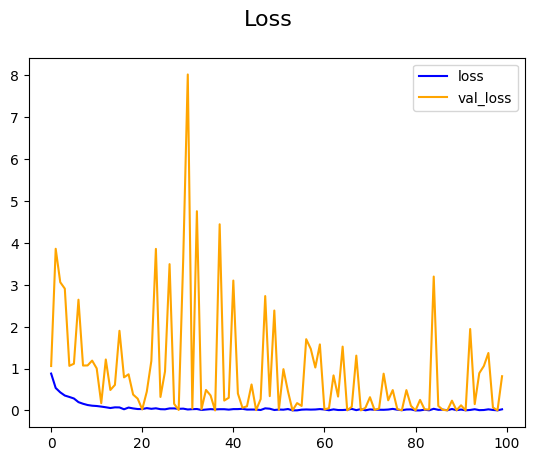

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 16)
plt.legend(loc = 'upper right')
plt.show()

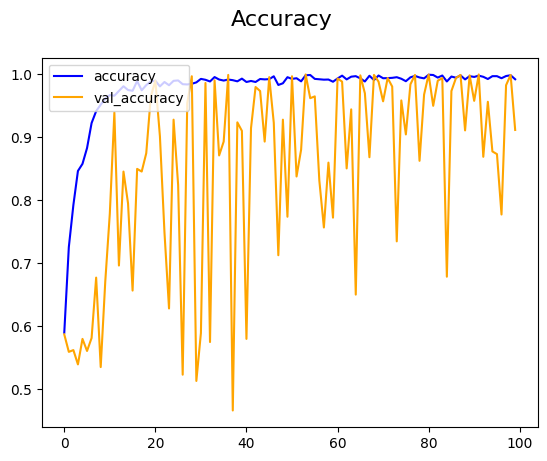

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'blue', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()

## CNN2

### Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import SGD

# CNN Model Architecture
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (350,350,3)))

# Max-Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation = 'relu'))

# Max-Pooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation = 'relu'))

# Average-Pooling Layer 3
model.add(AveragePooling2D(pool_size=(3, 3)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation = 'relu'))

# Average-Pooling Layer 4
model.add(AveragePooling2D(pool_size=(3, 3)))

# Convolutional Layer 5
model.add(Conv2D(512, (3, 3), activation = 'relu'))

# Average-Pooling Layer 5
model.add(AveragePooling2D(pool_size=(3, 3)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully-Connected Layer
model.add(Dense(512, activation = 'relu'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))  # Replace num_classes with the number of output classes

# Compile the model with momentum optimization
optimizer = SGD(momentum=0.9)  # Adjust momentum value as needed
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# # Display the model summary
# model.summary()


In [ ]:
model.compile(loss = tf.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 174, 174, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 average_pooling2d_3 (Averag  (None, 28, 28, 128)     

### Model Training

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs=100, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/100
152/152 [==============================] - 85s 464ms/step - loss: 0.6832 - accuracy: 0.5720 - val_loss: 0.6886 - val_accuracy: 0.5462
Epoch 2/100
152/152 [==============================] - 71s 464ms/step - loss: 0.6813 - accuracy: 0.5736 - val_loss: 0.6870 - val_accuracy: 0.5518
Epoch 3/100
152/152 [==============================] - 71s 463ms/step - loss: 0.6784 - accuracy: 0.5711 - val_loss: 0.6886 - val_accuracy: 0.5511
Epoch 4/100
152/152 [==============================] - 71s 461ms/step - loss: 0.6704 - accuracy: 0.5792 - val_loss: 0.6735 - val_accuracy: 0.5625
Epoch 5/100
152/152 [==============================] - 71s 465ms/step - loss: 0.6532 - accuracy: 0.6071 - val_loss: 0.6798 - val_accuracy: 0.5405
Epoch 6/100
152/152 [==============================] - 71s 462ms/step - loss: 0.6373 - accuracy: 0.6254 - val_loss: 0.6352 - val_accuracy: 0.6392
Epoch 7/100
152/152 [==============================] - 72s 465ms/step - loss: 0.6001 - accuracy: 0.6643 - val_loss: 0.6240 -

In [ ]:
hist.history

{'loss': [0.6832108497619629,
  0.6812726259231567,
  0.6783831119537354,
  0.6704153418540955,
  0.6532109379768372,
  0.6372608542442322,
  0.600130558013916,
  0.5720937848091125,
  0.5211844444274902,
  0.47212621569633484,
  0.4359072744846344,
  0.3942776918411255,
  0.35647955536842346,
  0.3186468183994293,
  0.3033055365085602,
  0.2816142141819,
  0.23033541440963745,
  0.19858956336975098,
  0.18550056219100952,
  0.1525849550962448,
  0.128287672996521,
  0.10944408923387527,
  0.11092981696128845,
  0.11439323425292969,
  0.09608373790979385,
  0.06381136924028397,
  0.06465916335582733,
  0.058217380195856094,
  0.0733715072274208,
  0.04186423867940903,
  0.08124862611293793,
  0.028530871495604515,
  0.04176737368106842,
  0.05068660527467728,
  0.010244270786643028,
  0.049357783049345016,
  0.035652805119752884,
  0.01923363097012043,
  0.007436378858983517,
  0.0011911987094208598,
  0.0005165979382582009,
  0.0005297687603160739,
  0.00019570151926018298,
  0.002058

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


1/1 [==============================] - 0s 106ms/step
Precision: 0.9770408272743225, Recall: 0.9696202278137207, BAccuracy: 0.9698275923728943, F1 Score: 0.9733163913595934, AUC: 0.9951764161655241


### Plot Performance

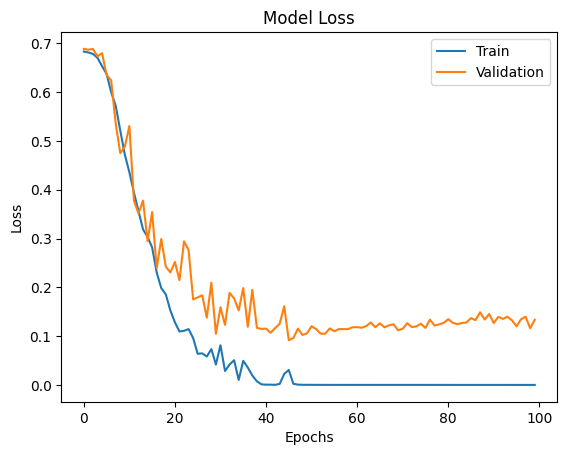

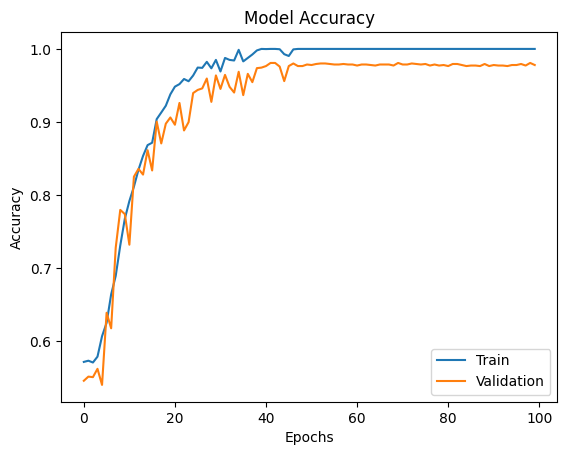

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.savefig('loss_curve_CNN1.png')  # Save the plot as an image file
plt.show()

# Plotting the accuracy curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.savefig('accuracy_curve_CNN1.png')  # Save the plot as an image file
plt.show()

## CNN3

### Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
model = Sequential()

# Input layer
input_shape = (350,350,3)
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))

# Convolutional layers
for _ in range(15):
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

# MaxPooling layers
for _ in range(8):
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer to convert 2D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected dense layers
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

# Final output layer for PCT classification using Softmax classifier
num_classes = 1  # Replace '2' with the actual number of classes for PCT classification
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss = tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 350, 350, 64)      36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 350, 350, 64)     

### Model Training

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs=100, validation_data= val, callbacks= [tensorboard_callback])

In [ ]:
hist.history

### Model Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import f1_score, roc_auc_score

pre = Precision()
re = Recall()
Bacc = BinaryAccuracy()

# Lists to store true labels and predicted probabilities for AUC calculation
true_labels = []
predicted_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    Bacc.update_state(y, yhat)

    # Flatten the true labels and predicted probabilities to calculate AUC
    true_labels.extend(y)
    predicted_probs.extend(yhat)

# Calculate F1 score and AUC
f1 = f1_score(true_labels, (np.array(predicted_probs) > 0.5).astype(int))
auc = roc_auc_score(true_labels, predicted_probs)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BAccuracy: {Bacc.result().numpy()}, F1 Score: {f1}, AUC: {auc}')


### Plot Performance

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.savefig('loss_curve_CNN1.png')  # Save the plot as an image file
plt.show()

# Plotting the accuracy curve
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.savefig('accuracy_curve_CNN1.png')  # Save the plot as an image file
plt.show()